<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">Intro to Tensor Flow and Keras</h2>


Let’s start off by importing the classes and functions we intend to use to train our model.

In [1]:
import os
import sys
import time
import re
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

First we'll develop a small ANN with Keras:

In [3]:
# load pima indians dataset
dataset = numpy.loadtxt("../../data/pima-indians-diabetes.csv", delimiter=",")

In [4]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [5]:
# create model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="uniform"))

In [6]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
52/52 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.6401 - val_loss: 0.6606 - val_accuracy: 0.6732
Epoch 2/200
52/52 [==============================] - 0s 872us/step - loss: 0.6653 - accuracy: 0.6401 - val_loss: 0.6523 - val_accuracy: 0.6732
Epoch 3/200
52/52 [==============================] - 0s 764us/step - loss: 0.6548 - accuracy: 0.6401 - val_loss: 0.6438 - val_accuracy: 0.6732
Epoch 4/200
52/52 [==============================] - 0s 782us/step - loss: 0.6478 - accuracy: 0.6401 - val_loss: 0.6368 - val_accuracy: 0.6732
Epoch 5/200
52/52 [==============================] - 0s 765us/step - loss: 0.6320 - accuracy: 0.6401 - val_loss: 0.6306 - val_accuracy: 0.6811
Epoch 6/200
52/52 [==============================] - 0s 770us/step - loss: 0.6283 - accuracy: 0.6751 - val_loss: 0.6243 - val_accuracy: 0.6693
Epoch 7/200
52/52 [==============================] - 0s 767us/step - loss: 0.6184 - accuracy: 0.6673 - val_loss: 0.6157 - val_accuracy: 0.6535
E

In [8]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


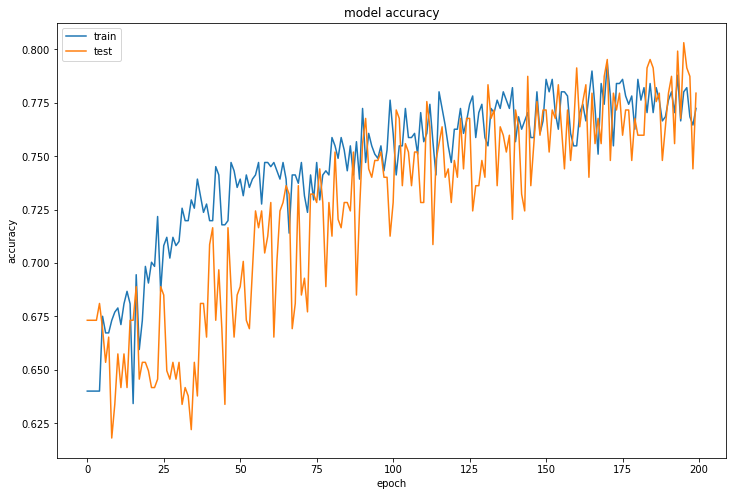

In [9]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

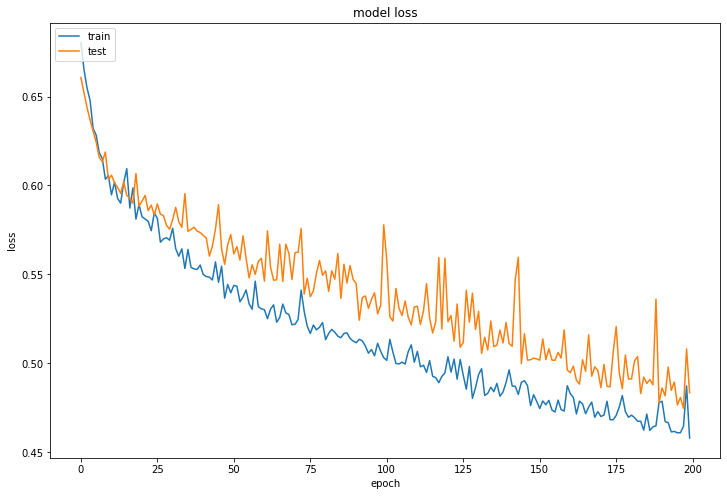

In [10]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n{}: {}".format(model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 653us/step - loss: 0.4591 - accuracy: 0.7917

accuracy: 79.16666865348816


In [12]:
# calculate predictions
predictions = model.predict(X)
print(predictions[0:10])

print()

# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded[0:10])

[[0.725257  ]
 [0.07689673]
 [0.8910152 ]
 [0.09531748]
 [0.754863  ]
 [0.2794119 ]
 [0.16233262]
 [0.7579325 ]
 [0.7559716 ]
 [0.06896162]]

[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]
